In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import sklearn.metrics as sk
import seaborn as sns
import numpy as np
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
feature_vector_length = 28*28
num_classes = 10

In [5]:
# Transformar as intensidades dos pixels das imagens em valores reais entre 0 e 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

X_train_vec = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test_vec = X_test.reshape(X_test.shape[0], feature_vector_length)

X_train_CNN = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test_CNN = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Convert target classes to categorical ones
Y_train_ohe = to_categorical(Y_train, num_classes)
Y_test_ohe = to_categorical(Y_test, num_classes)

In [6]:
X_train_vec.shape

(60000, 784)

In [7]:
Y_train_ohe.shape

(60000, 10)

Feature shape: (784,)
Epoch 00018: early stopping


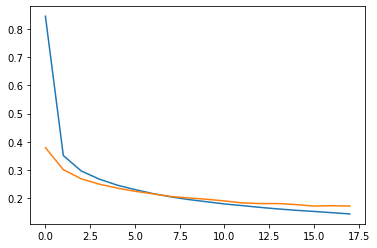

In [16]:
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')
MAXepochs = 100
Ndense = 20
# Create the model
model1 = Sequential()
model1.add(Dense(Ndense, input_shape=input_shape))
model1.add(LeakyReLU(alpha=0.1))
model1.add(Dense(num_classes, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
result1 = model1.fit(X_train_vec, Y_train_ohe, epochs=MAXepochs, batch_size=250, verbose=0, validation_split=0.2, callbacks=[es])
epoch = list(range(1,MAXepochs + 1))
plt.plot(result1.history['loss'])
plt.plot(result1.history['val_loss'])

313/313 [==============================] - 0s 740us/step - loss: 0.1724 - accuracy: 0.9490


Text(0.5, 1.0, 'Matriz de confusão da MLP com 1 camada')

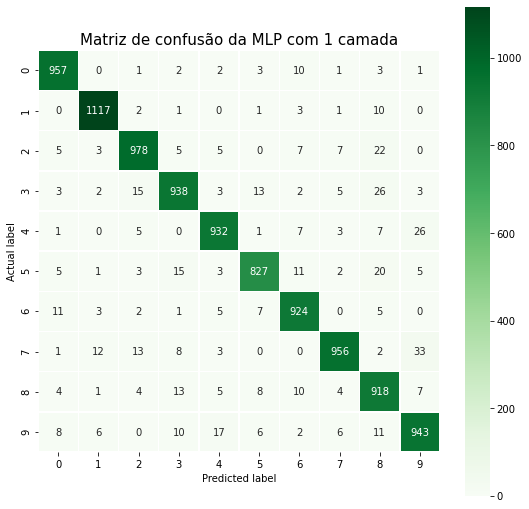

In [17]:
accuracy1 = model1.evaluate(X_test_vec, Y_test_ohe, verbose=1)[1]
Y_pred1 = np.argmax(model1.predict(X_test_vec), axis=-1)
cmatrix1 = sk.confusion_matrix(Y_test,Y_pred1)
plt.figure(figsize=(9,9))
sns.heatmap(cmatrix1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Matriz de confusão da MLP com 1 camada'
plt.title(all_sample_title, size = 15)

Epoch 00016: early stopping


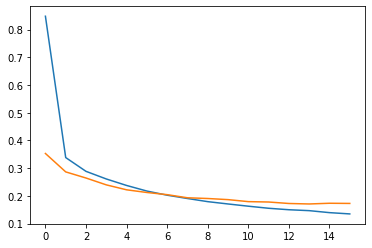

In [18]:
# Create the model
model2 = Sequential()
model2.add(Dense(Ndense, input_shape=input_shape))
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dense(Ndense))
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
result2 = model2.fit(X_train_vec, Y_train_ohe, epochs=MAXepochs, batch_size=250, verbose=0, validation_split=0.2, callbacks=[es])
epoch = list(range(1,MAXepochs + 1))
plt.plot(result2.history['loss'])
plt.plot(result2.history['val_loss'])

313/313 [==============================] - 0s 753us/step - loss: 0.1680 - accuracy: 0.9494


Text(0.5, 1.0, 'Matriz de confusão da MLP com 2 camadas')

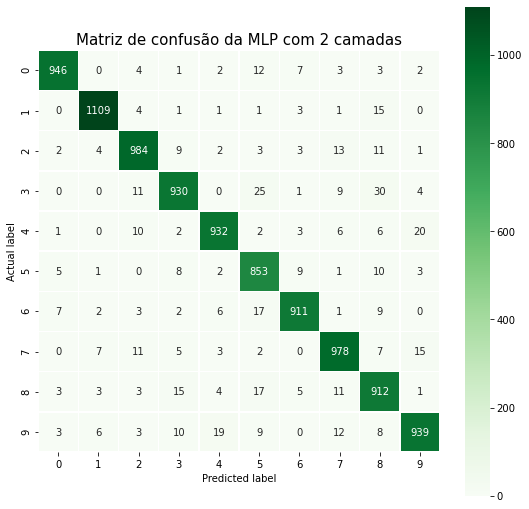

In [19]:
accuracy2 = model2.evaluate(X_test_vec, Y_test_ohe, verbose=1)[1]
Y_pred2 = np.argmax(model2.predict(X_test_vec), axis=-1)
cmatrix2 = sk.confusion_matrix(Y_test,Y_pred2)
plt.figure(figsize=(9,9))
sns.heatmap(cmatrix2, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Matriz de confusão da MLP com 2 camadas'
plt.title(all_sample_title, size = 15)

Epoch 00023: early stopping


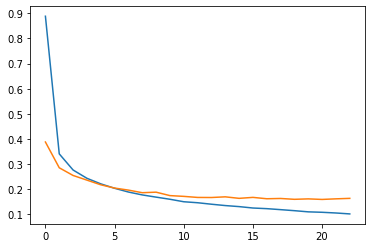

In [20]:
# Create the model
model3 = Sequential()
model3.add(Dense(Ndense, input_shape=input_shape))
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dense(Ndense))
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dense(Ndense))
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dense(num_classes, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
result3 = model3.fit(X_train_vec, Y_train_ohe, epochs=MAXepochs, batch_size=250, verbose=0, validation_split=0.2, callbacks=[es])
epoch = list(range(1,MAXepochs + 1))
plt.plot(result3.history['loss'])
plt.plot(result3.history['val_loss'])

313/313 [==============================] - 0s 754us/step - loss: 0.1665 - accuracy: 0.9525


Text(0.5, 1.0, 'Matriz de confusão da MLP com 3 camadas')

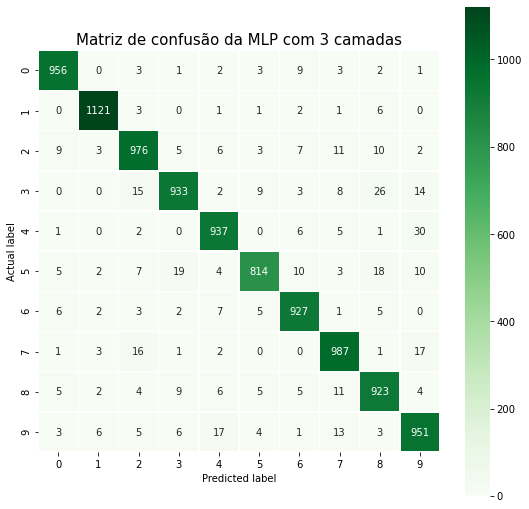

In [50]:
accuracy3 = model3.evaluate(X_test_vec, Y_test_ohe, verbose=1)[1]
Y_pred3 = np.argmax(model3.predict(X_test_vec), axis=-1)
cmatrix3 = sk.confusion_matrix(Y_test,Y_pred3)
plt.figure(figsize=(9,9))
sns.heatmap(cmatrix3, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Matriz de confusão da MLP com 3 camadas'
plt.title(all_sample_title, size = 15)

In [6]:
def define_model_CNN(Nkernels, kernelsize):
	modelCNN = Sequential()
	modelCNN.add(Conv2D(Nkernels, (kernelsize, kernelsize), activation='relu', input_shape=(28, 28, 1)))
	modelCNN.add(MaxPooling2D((22, 2)))
	modelCNN.add(Flatten())
	modelCNN.add(Dense(10, activation='softmax'))
	modelCNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return modelCNN

In [60]:
X_train.shape

(60000, 28, 28)

Epoch 1/1000
192/192 [==============================] - 5s 25ms/step - loss: 0.5111 - accuracy: 0.8690 - val_loss: 0.2409 - val_accuracy: 0.9337
Epoch 2/1000
192/192 [==============================] - 5s 25ms/step - loss: 0.2100 - accuracy: 0.9389 - val_loss: 0.1622 - val_accuracy: 0.9561
Epoch 3/1000
192/192 [==============================] - 5s 25ms/step - loss: 0.1409 - accuracy: 0.9601 - val_loss: 0.1185 - val_accuracy: 0.9691
Epoch 4/1000
192/192 [==============================] - 5s 25ms/step - loss: 0.1060 - accuracy: 0.9704 - val_loss: 0.0995 - val_accuracy: 0.9733
Epoch 5/1000
192/192 [==============================] - 5s 25ms/step - loss: 0.0874 - accuracy: 0.9760 - val_loss: 0.0877 - val_accuracy: 0.9758
Epoch 6/1000
192/192 [==============================] - 5s 25ms/step - loss: 0.0745 - accuracy: 0.9794 - val_loss: 0.0781 - val_accuracy: 0.9785
Epoch 7/1000
192/192 [==============================] - 5s 24ms/step - loss: 0.0667 - accuracy: 0.9817 - val_loss: 0.0746 - val_ac

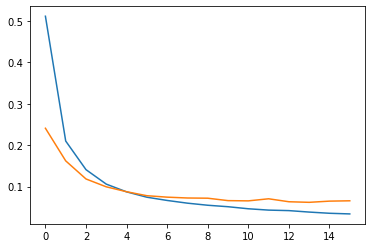

In [8]:
MAXepochs = 1000
modelCNN = define_model_CNN(32, 3)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
resultCNN = modelCNN.fit(X_train_CNN, Y_train_ohe, epochs=MAXepochs, batch_size=250, verbose=1, validation_split=0.2, callbacks=[es])
epoch = list(range(1,MAXepochs + 1))
plt.plot(resultCNN.history['loss'])
plt.plot(resultCNN.history['val_loss'])

In [26]:
Nkernels_vec = (8, 16, 32, 64, 128, 256)
Kernel_dim_default = 3
accuracy_vs_Nkernels = []
for Nkernels in Nkernels_vec:
    modelCNN = define_model_CNN(Nkernels, Kernel_dim_default)
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
    resultCNN = modelCNN.fit(X_train_CNN, Y_train_ohe, epochs=MAXepochs, batch_size=250, verbose=1, validation_split=0.2, callbacks=[es])
    accuracy = modelCNN.evaluate(X_test_CNN, Y_test_ohe, verbose=1)[1]
    accuracy_vs_Nkernels.append(accuracy)

Epoch 1/100
192/192 [==============================] - 3s 14ms/step - loss: 0.7350 - accuracy: 0.8197 - val_loss: 0.2926 - val_accuracy: 0.9196
Epoch 2/100
192/192 [==============================] - 3s 13ms/step - loss: 0.2655 - accuracy: 0.9240 - val_loss: 0.2134 - val_accuracy: 0.9422
Epoch 3/100
192/192 [==============================] - 2s 13ms/step - loss: 0.2029 - accuracy: 0.9419 - val_loss: 0.1768 - val_accuracy: 0.9522
Epoch 4/100
192/192 [==============================] - 2s 13ms/step - loss: 0.1671 - accuracy: 0.9527 - val_loss: 0.1482 - val_accuracy: 0.9603
Epoch 5/100
192/192 [==============================] - 3s 13ms/step - loss: 0.1433 - accuracy: 0.9592 - val_loss: 0.1347 - val_accuracy: 0.9644
Epoch 6/100
192/192 [==============================] - 3s 14ms/step - loss: 0.1272 - accuracy: 0.9641 - val_loss: 0.1238 - val_accuracy: 0.9667
Epoch 7/100
192/192 [==============================] - 3s 13ms/step - loss: 0.1166 - accuracy: 0.9668 - val_loss: 0.1190 - val_accuracy:

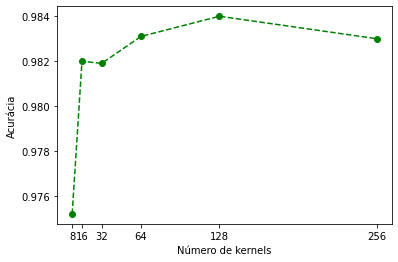

In [47]:
plt.plot(Nkernels_vec,accuracy_vs_Nkernels, '--go')
plt.xlabel('Número de kernels')
plt.ylabel('Acurácia')
plt.xticks([8, 16, 32, 64, 128, 256])
pass

In [29]:
Kernel_dim_vec = (2, 3, 4, 5, 6, 7, 8)
Nkernels_default = 32
accuracy_vs_kerneldim = []
for Kernel_dim in Kernel_dim_vec:
    modelCNN = define_model_CNN(Nkernels_default, Kernel_dim)
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
    resultCNN = modelCNN.fit(X_train_CNN, Y_train_ohe, epochs=MAXepochs, batch_size=250, verbose=1, validation_split=0.2, callbacks=[es])
    accuracy = modelCNN.evaluate(X_test_CNN, Y_test_ohe, verbose=1)[1]
    accuracy_vs_kerneldim.append(accuracy)

Epoch 1/100
192/192 [==============================] - 6s 29ms/step - loss: 0.5784 - accuracy: 0.8547 - val_loss: 0.2737 - val_accuracy: 0.9237
Epoch 2/100
192/192 [==============================] - 5s 27ms/step - loss: 0.2611 - accuracy: 0.9241 - val_loss: 0.2144 - val_accuracy: 0.9411
Epoch 3/100
192/192 [==============================] - 5s 28ms/step - loss: 0.2052 - accuracy: 0.9416 - val_loss: 0.1736 - val_accuracy: 0.9518
Epoch 4/100
192/192 [==============================] - 5s 27ms/step - loss: 0.1626 - accuracy: 0.9544 - val_loss: 0.1433 - val_accuracy: 0.9617
Epoch 5/100
192/192 [==============================] - 5s 28ms/step - loss: 0.1344 - accuracy: 0.9630 - val_loss: 0.1262 - val_accuracy: 0.9647
Epoch 6/100
192/192 [==============================] - 5s 28ms/step - loss: 0.1135 - accuracy: 0.9694 - val_loss: 0.1111 - val_accuracy: 0.9700
Epoch 7/100
192/192 [==============================] - 5s 27ms/step - loss: 0.1003 - accuracy: 0.9728 - val_loss: 0.1035 - val_accuracy:

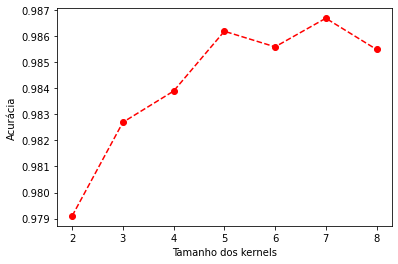

In [46]:
plt.plot(Kernel_dim_vec,accuracy_vs_kerneldim,'--ro')
plt.xlabel('Tamanho dos kernels')
plt.ylabel('Acurácia')
pass

In [52]:
best_Nkernels

128

In [51]:
best_Nkernels = Nkernels_vec[np.array(accuracy_vs_Nkernels).argmax()]
best_Kernel_dim = Kernel_dim_vec[np.array(accuracy_vs_kerneldim).argmax()]

In [53]:
best_Kernel_dim

7

In [55]:
modelCNN_final = define_model_CNN(best_Nkernels, best_Kernel_dim)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
resultCNN_final = modelCNN_final.fit(X_train_CNN, Y_train_ohe, epochs=MAXepochs, batch_size=250, verbose=1, validation_split=0.2, callbacks=[es])
accuracyCNN_final = modelCNN_final.evaluate(X_test_CNN, Y_test_ohe, verbose=1)[1]

Epoch 1/100
192/192 [==============================] - 17s 88ms/step - loss: 0.3042 - accuracy: 0.9150 - val_loss: 0.1103 - val_accuracy: 0.9701
Epoch 2/100
192/192 [==============================] - 16s 85ms/step - loss: 0.0868 - accuracy: 0.9747 - val_loss: 0.0688 - val_accuracy: 0.9802
Epoch 3/100
192/192 [==============================] - 16s 84ms/step - loss: 0.0604 - accuracy: 0.9820 - val_loss: 0.0596 - val_accuracy: 0.9822
Epoch 4/100
192/192 [==============================] - 16s 85ms/step - loss: 0.0488 - accuracy: 0.9855 - val_loss: 0.0535 - val_accuracy: 0.9843
Epoch 5/100
192/192 [==============================] - 16s 83ms/step - loss: 0.0404 - accuracy: 0.9874 - val_loss: 0.0581 - val_accuracy: 0.9834
Epoch 6/100
192/192 [==============================] - 16s 83ms/step - loss: 0.0341 - accuracy: 0.9896 - val_loss: 0.0504 - val_accuracy: 0.9847
Epoch 7/100
192/192 [==============================] - 16s 83ms/step - loss: 0.0297 - accuracy: 0.9910 - val_loss: 0.0447 - val_ac

313/313 [==============================] - 1s 4ms/step - loss: 0.0375 - accuracy: 0.9885


Text(0.5, 1.0, 'Matriz de confusão do melhor modelo CNN')

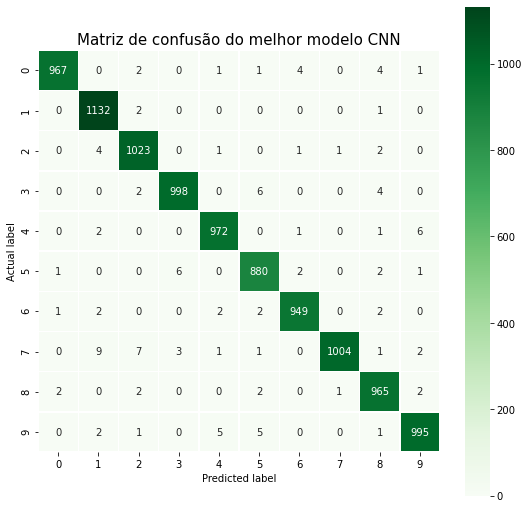

In [64]:
accuracyCNN = modelCNN_final.evaluate(X_test_CNN, Y_test_ohe, verbose=1)[1]
Y_pred_CNN = np.argmax(modelCNN_final.predict(X_test_CNN), axis=-1)
cmatrixCNN_final = sk.confusion_matrix(Y_test,Y_pred_CNN)
plt.figure(figsize=(9,9))
sns.heatmap(cmatrixCNN_final, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Matriz de confusão do melhor modelo CNN'
plt.title(all_sample_title, size = 15) 


18


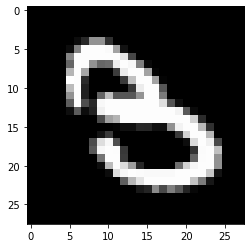

211


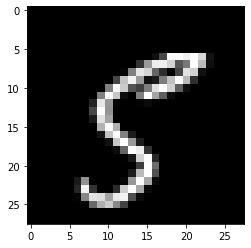

324


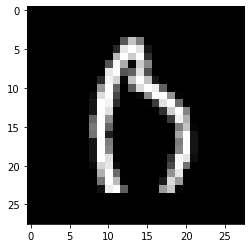

326


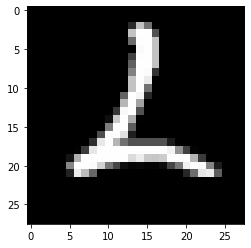

340


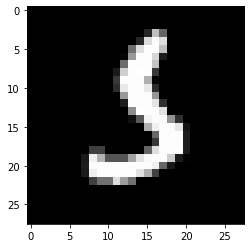

449


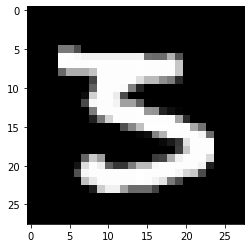

659


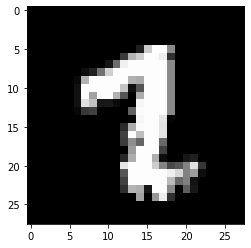

684


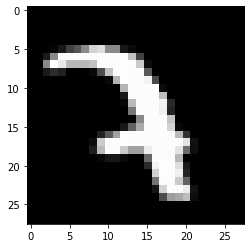

720


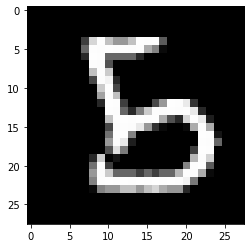

726


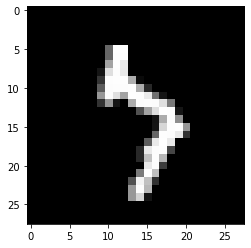

740


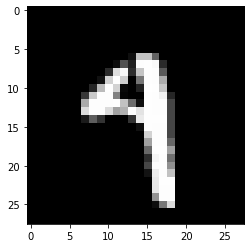

883


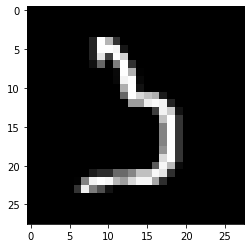

895


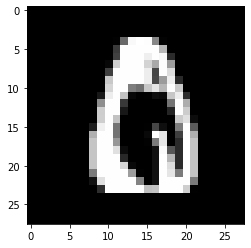

947


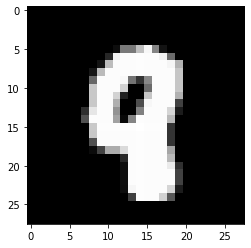

1014


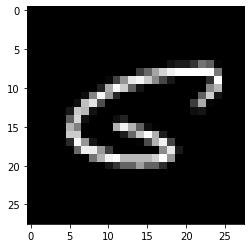

1039


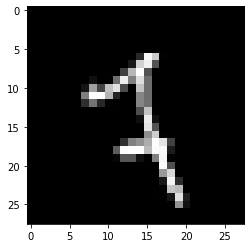

1112


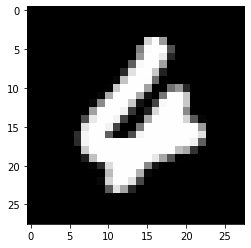

1224


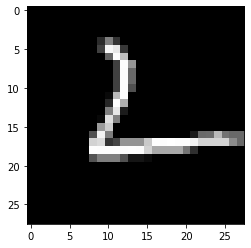

1226


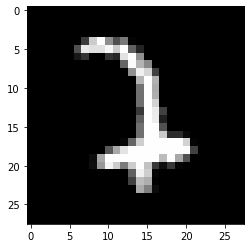

1232


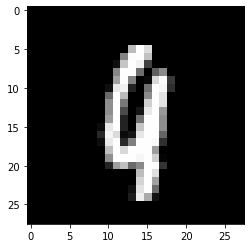

1242


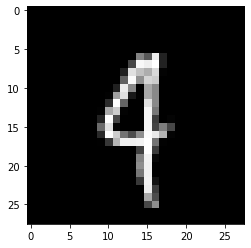

1247


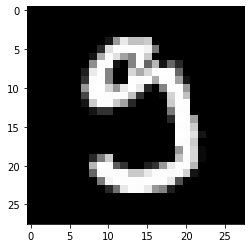

1260


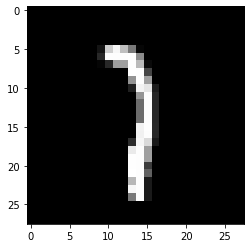

1319


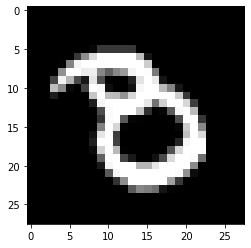

1326


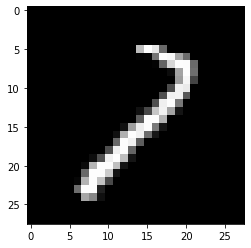

1393


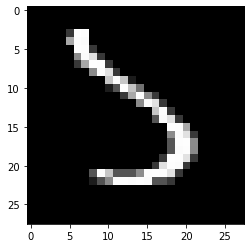

1522


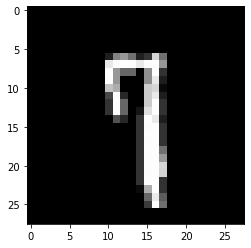

1621


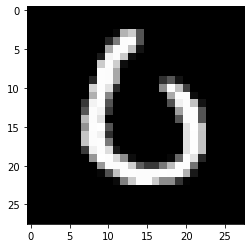

1709


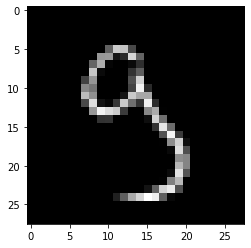

1754


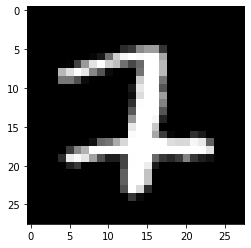

1790


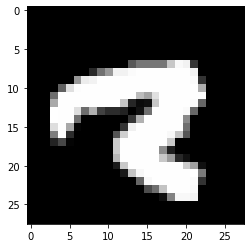

1809


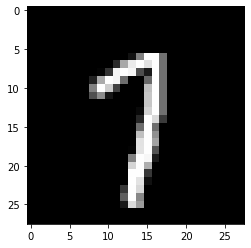

1901


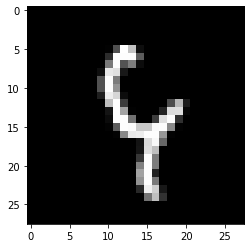

2035


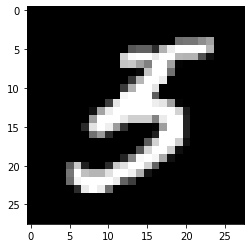

2118


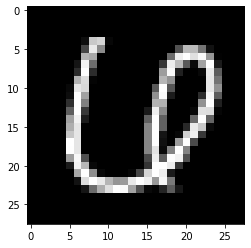

2129


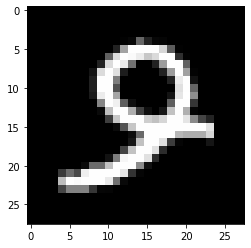

2130


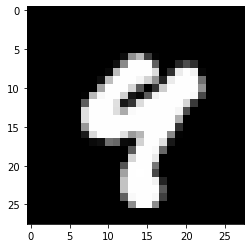

2135


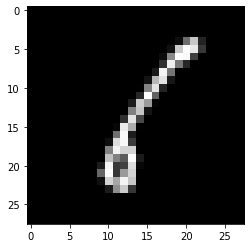

2280


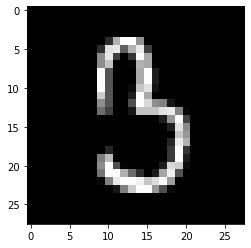

2293


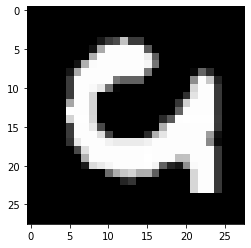

2329


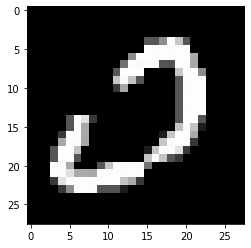

2369


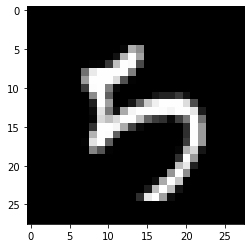

2387


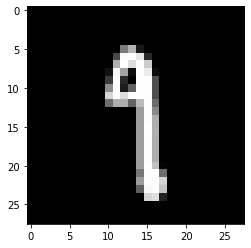

2406


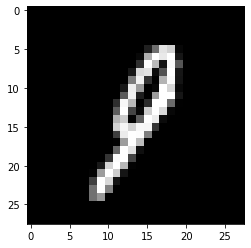

2597


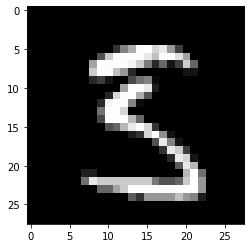

2654


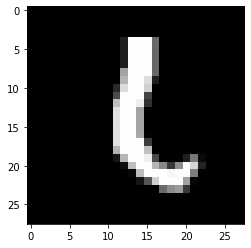

2713


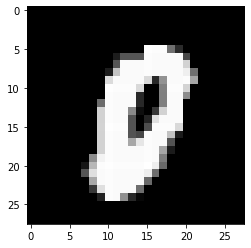

2836


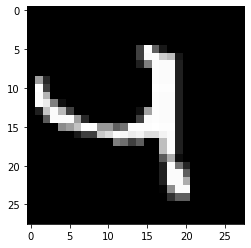

2896


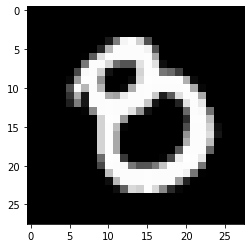

2921


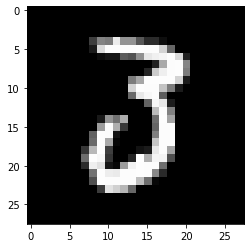

2939


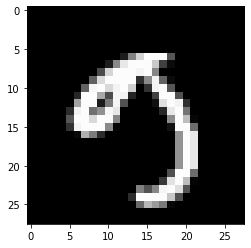

2953


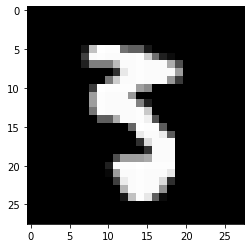

2995


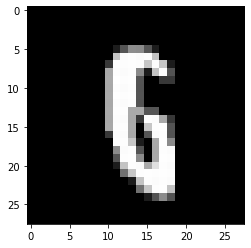

3060


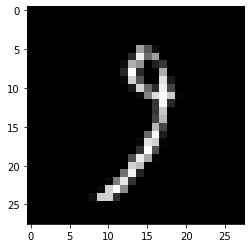

3073


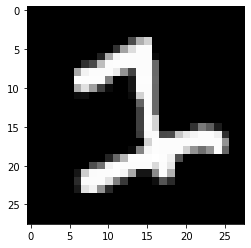

3384


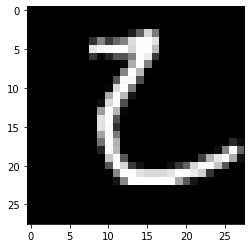

3503


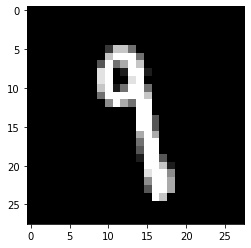

3520


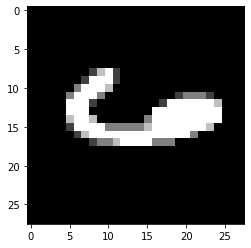

3534


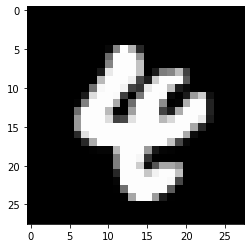

3559


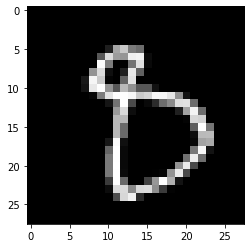

3580


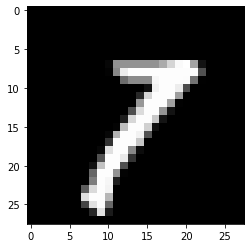

3727


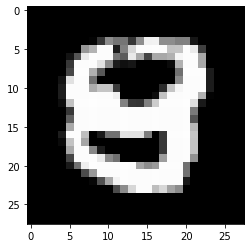

3806


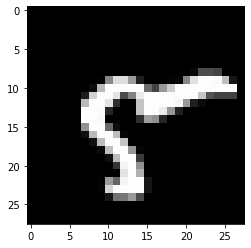

3808


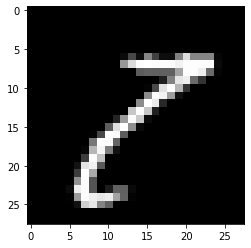

4007


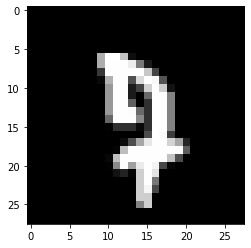

4027


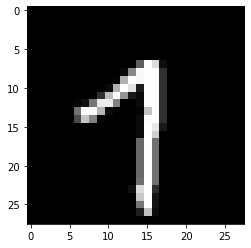

4176


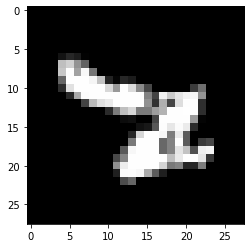

4238


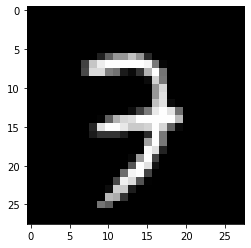

4248


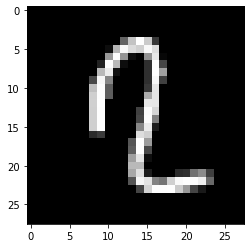

4256


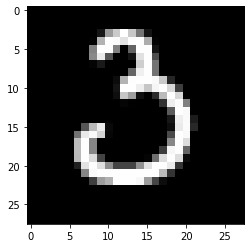

4400


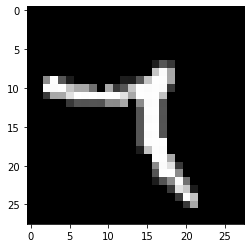

4497


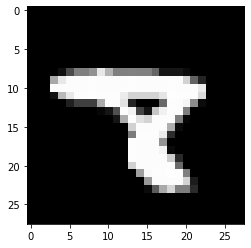

4507


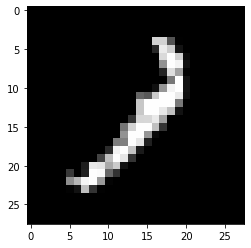

4571


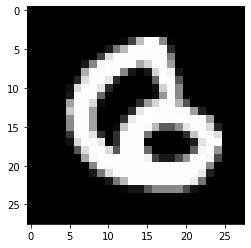

4740


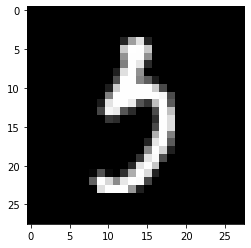

4761


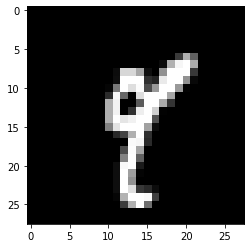

4783


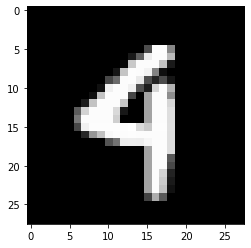

4823


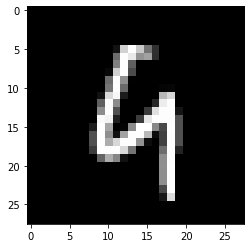

4860


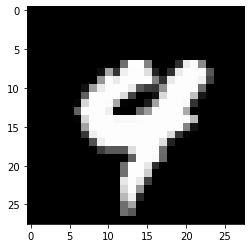

4966


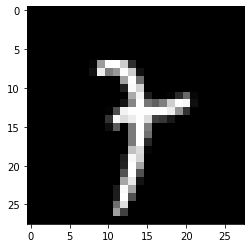

5246


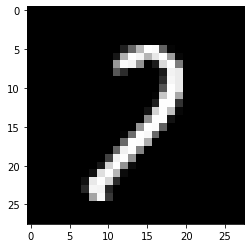

5600


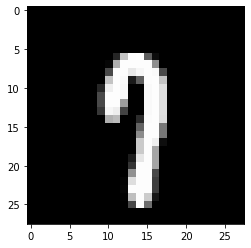

5745


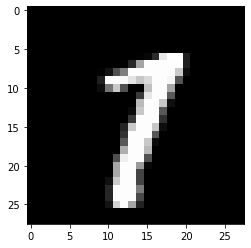

5749


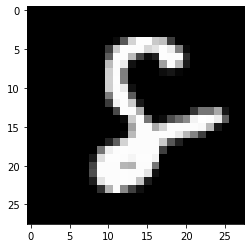

5955


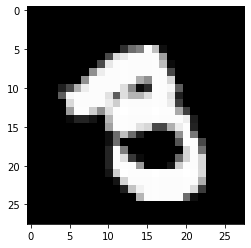

5973


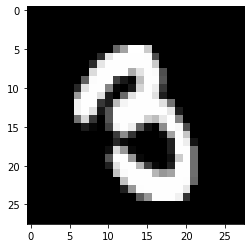

5997


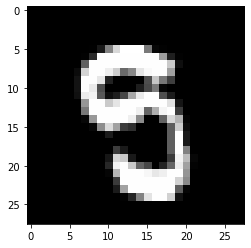

6011


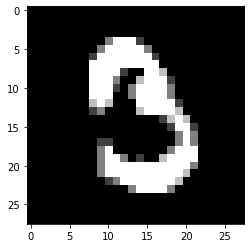

6091


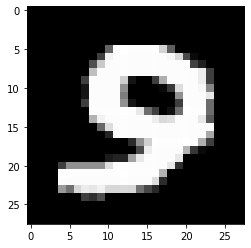

6400


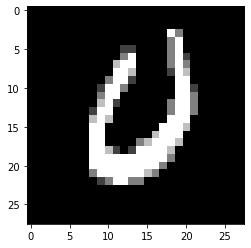

6426


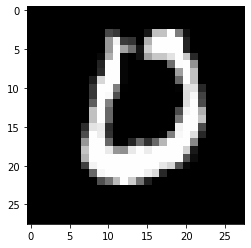

6532


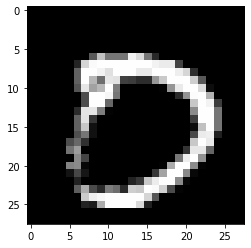

6557


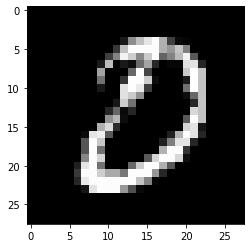

6569


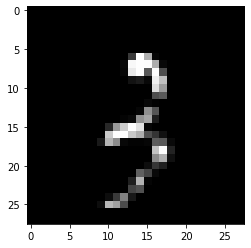

6576


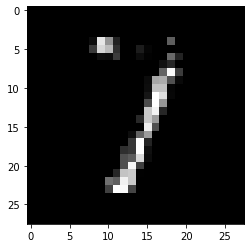

6597


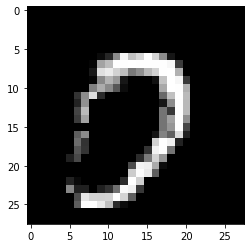

6625


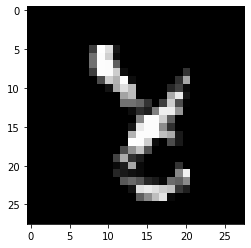

6651


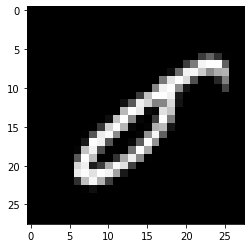

7049


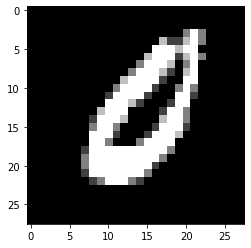

7268


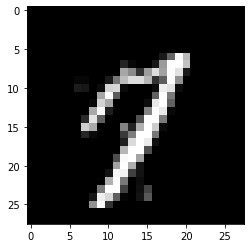

8059


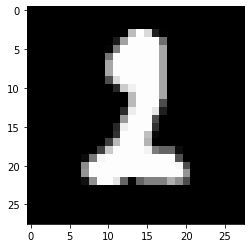

8408


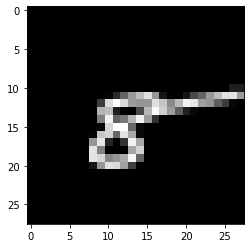

8527


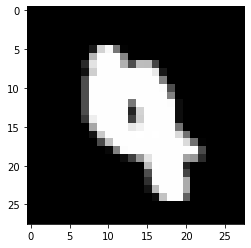

9009


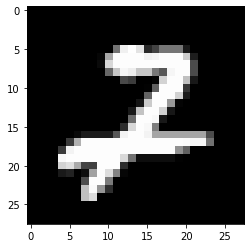

9015


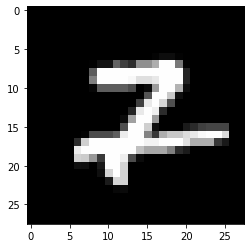

9019


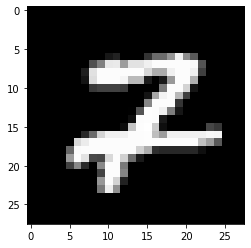

9540


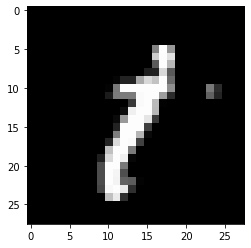

9634


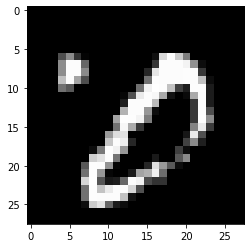

9679


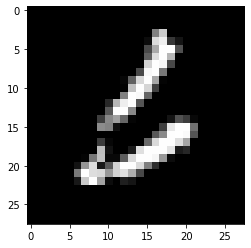

9698


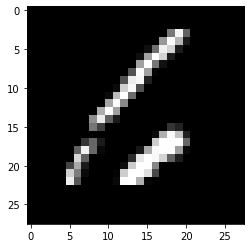

9729


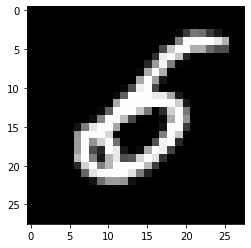

9770


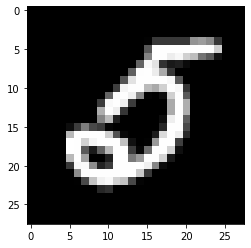

9792


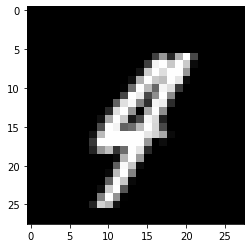

9904


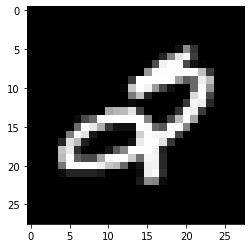

9982


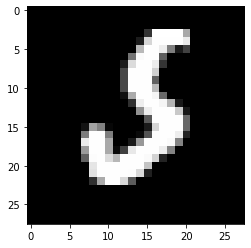

IndexError: index 10000 is out of bounds for axis 0 with size 10000

In [65]:
for index in range(1,10001):
    if Y_test[index] != Y_pred_CNN[index]:
        print(index)
        plt.imshow(X_test[index] * 255, cmap = 'gray')
        plt.show()

In [66]:
Y_pred_CNN

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [67]:
Y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [78]:
modelCNNlast = Sequential()
modelCNNlast.add(Conv2D(best_Nkernels, (best_Kernel_dim, best_Kernel_dim), activation='relu', input_shape=(28, 28, 1)))
modelCNNlast.add(MaxPooling2D((2, 2)))
modelCNNlast.add(Conv2D(best_Nkernels, (best_Kernel_dim, best_Kernel_dim), activation='relu'))
modelCNNlast.add(MaxPooling2D((2, 2)))
modelCNNlast.add(Flatten())
modelCNNlast.add(Dense(100, activation='relu'))
modelCNNlast.add(Dense(10, activation='softmax'))
modelCNNlast.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
resultCNNlast = modelCNNlast.fit(X_train_CNN, Y_train_ohe, epochs=MAXepochs, batch_size=250, verbose=1, validation_split=0.2, callbacks=[es])
accuracyCNNlast = modelCNNlast.evaluate(X_test_CNN, Y_test_ohe, verbose=1)[1]

Epoch 1/100
192/192 [==============================] - 42s 220ms/step - loss: 0.2784 - accuracy: 0.9189 - val_loss: 0.0947 - val_accuracy: 0.9710
Epoch 2/100
192/192 [==============================] - 42s 221ms/step - loss: 0.0669 - accuracy: 0.9787 - val_loss: 0.0559 - val_accuracy: 0.9830
Epoch 3/100
192/192 [==============================] - 43s 225ms/step - loss: 0.0434 - accuracy: 0.9866 - val_loss: 0.0435 - val_accuracy: 0.9862
Epoch 4/100
192/192 [==============================] - 43s 222ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0443 - val_accuracy: 0.9859
Epoch 5/100
192/192 [==============================] - 42s 221ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0372 - val_accuracy: 0.9886
Epoch 6/100
192/192 [==============================] - 43s 223ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0421 - val_accuracy: 0.9887
Epoch 7/100
192/192 [==============================] - 41s 216ms/step - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.0383 -

313/313 [==============================] - 2s 7ms/step - loss: 0.0298 - accuracy: 0.9907


Text(0.5, 1.0, 'Matriz de confusão do modelo CNN aprimorado')

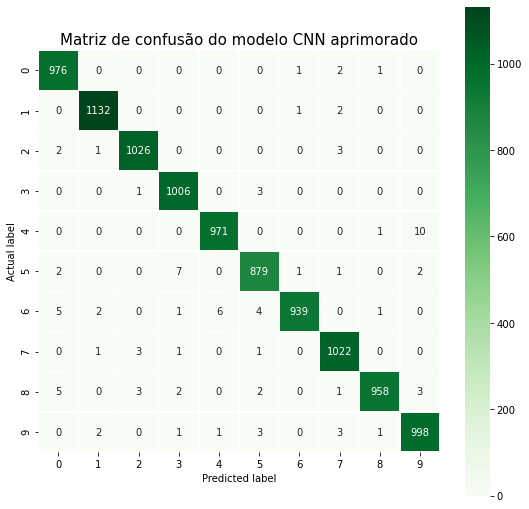

In [72]:
accuracyCNNlast2 = modelCNNlast.evaluate(X_test_CNN, Y_test_ohe, verbose=1)[1]
Y_pred_CNNlast = np.argmax(modelCNNlast.predict(X_test_CNN), axis=-1)
cmatrixCNNlast = sk.confusion_matrix(Y_test,Y_pred_CNNlast)
plt.figure(figsize=(9,9))
sns.heatmap(cmatrixCNNlast, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Matriz de confusão do modelo CNN aprimorado'
plt.title(all_sample_title, size = 15) 

115


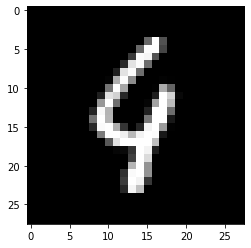

340


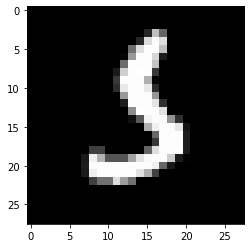

445


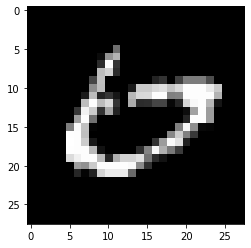

449


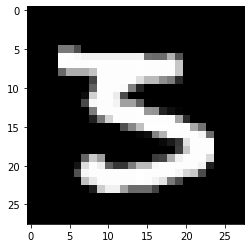

495


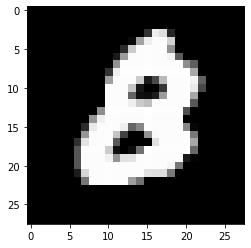

582


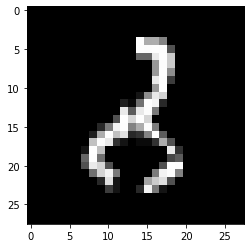

625


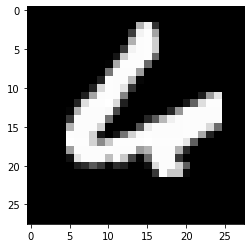

726


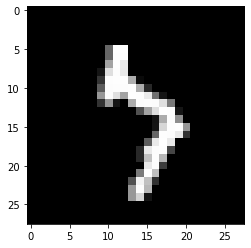

740


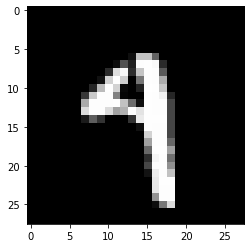

813


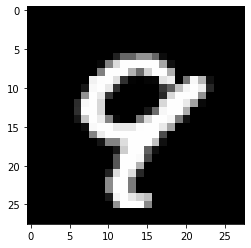

947


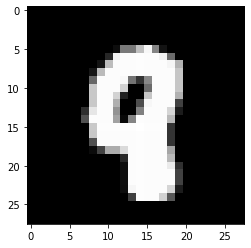

1014


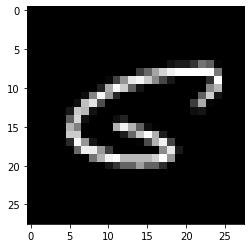

1039


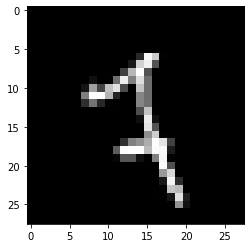

1182


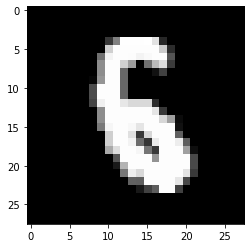

1226


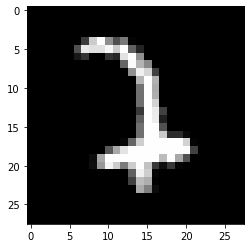

1242


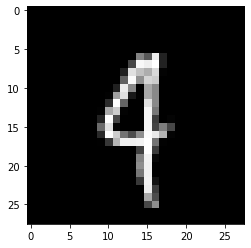

1247


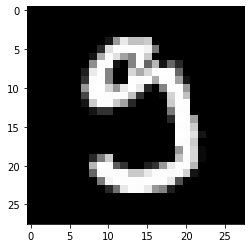

1299


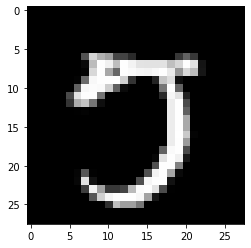

1319


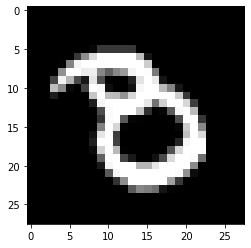

1393


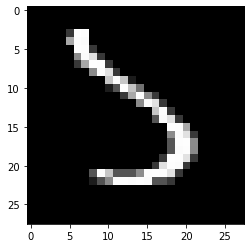

1530


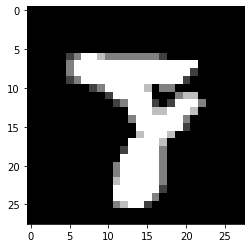

1621


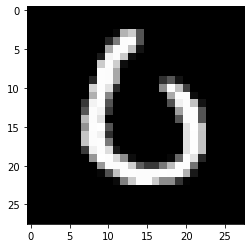

1737


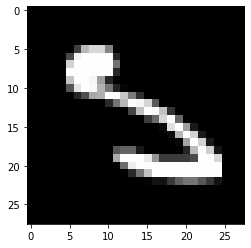

1878


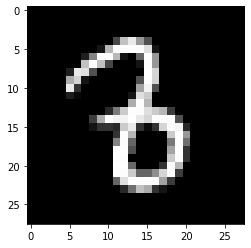

1955


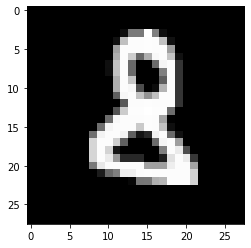

2018


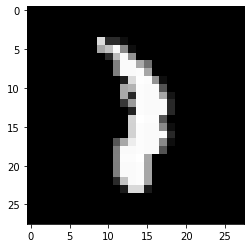

2035


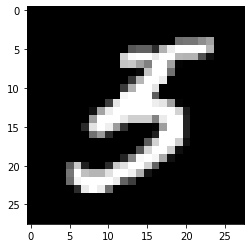

2053


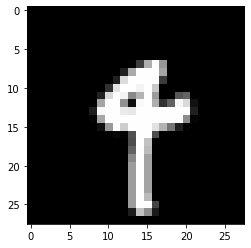

2098


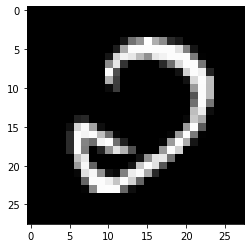

2118


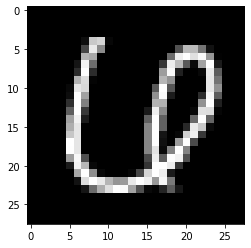

2130


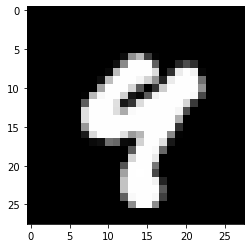

2135


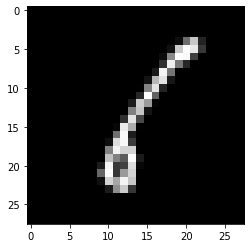

2293


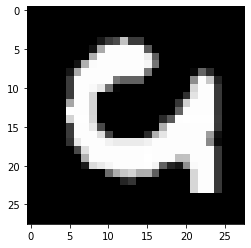

2387


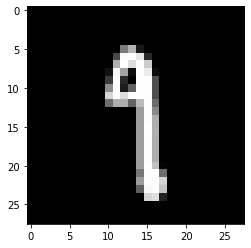

2447


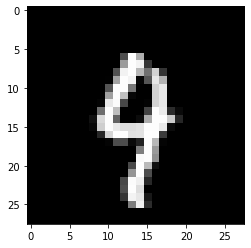

2462


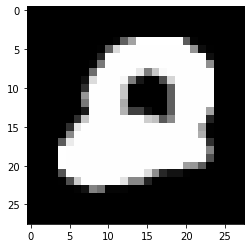

2488


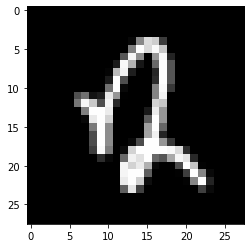

2597


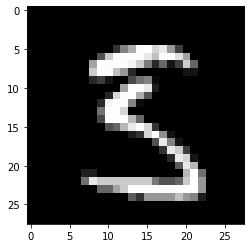

2654


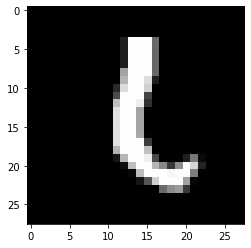

2896


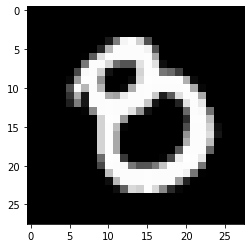

2927


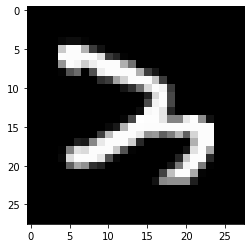

2939


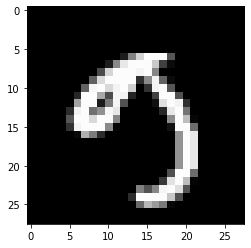

2953


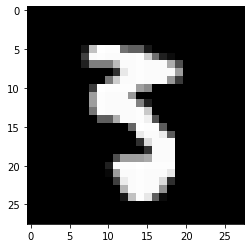

2995


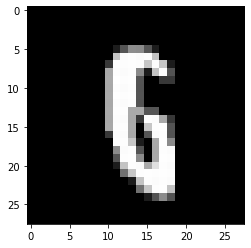

3422


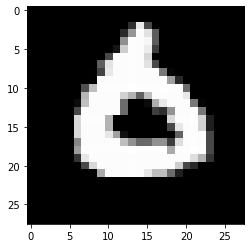

3503


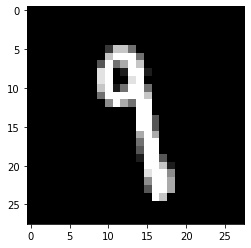

3520


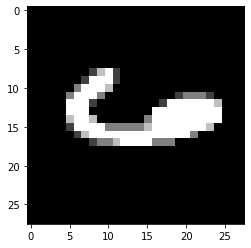

3534


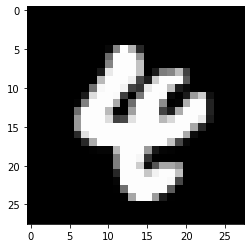

3558


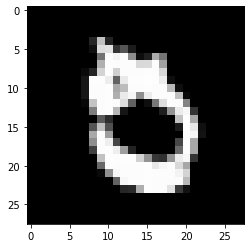

3559


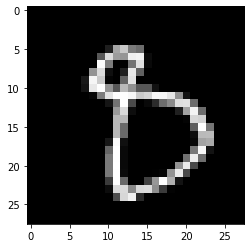

3574


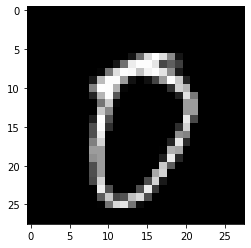

3727


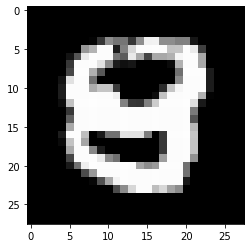

3762


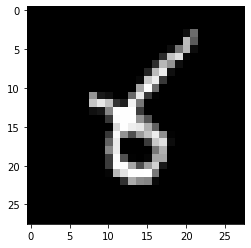

3767


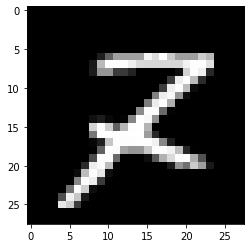

4075


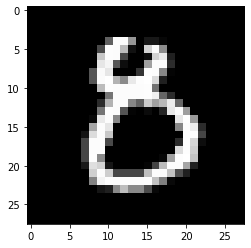

4078


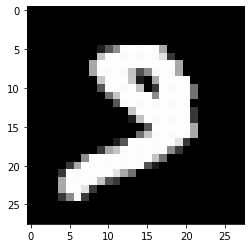

4163


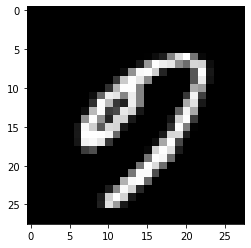

4176


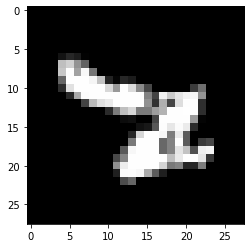

4224


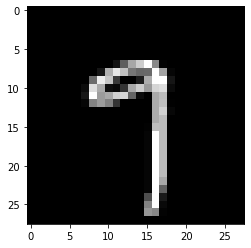

4238


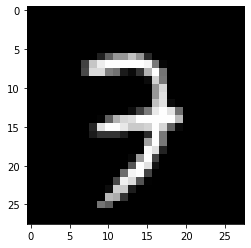

4248


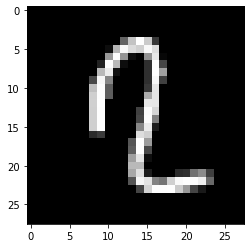

4536


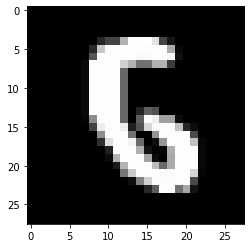

4571


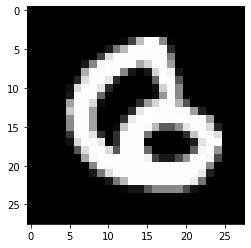

4731


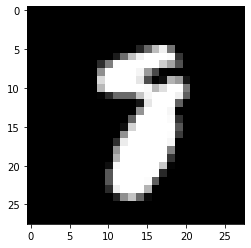

4740


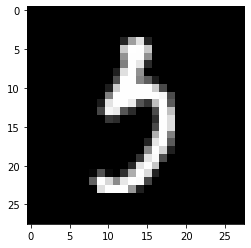

4807


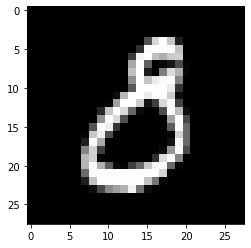

4814


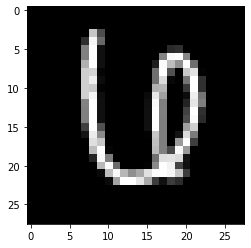

4860


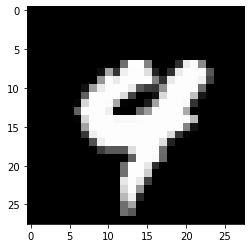

5199


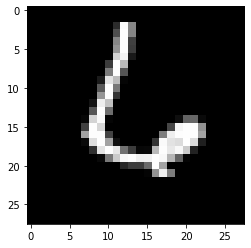

5228


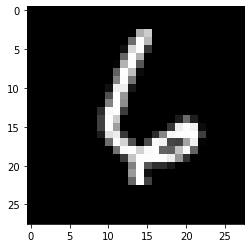

5937


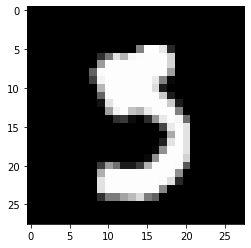

5982


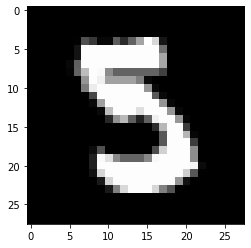

5997


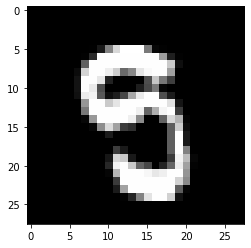

6042


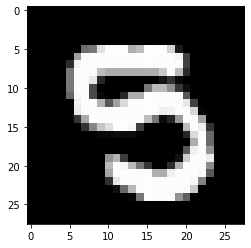

6091


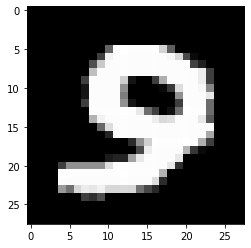

6555


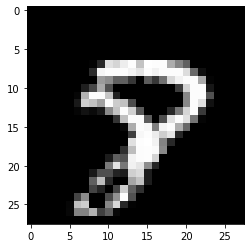

6572


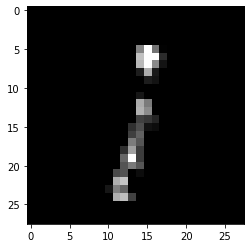

6597


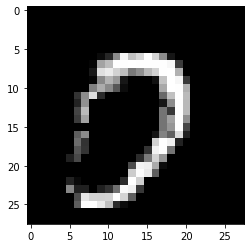

6625


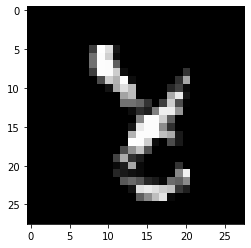

6651


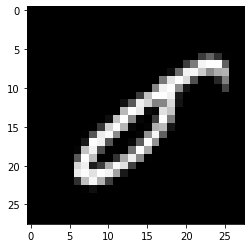

6783


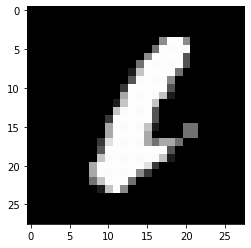

6847


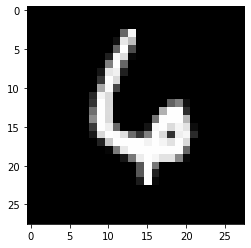

8311


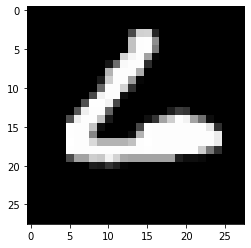

8408


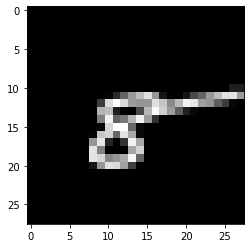

8527


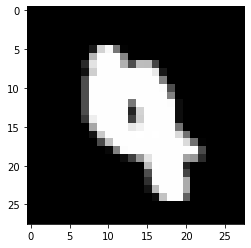

9015


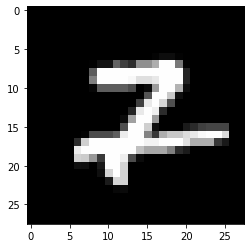

9664


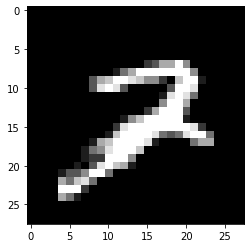

9679


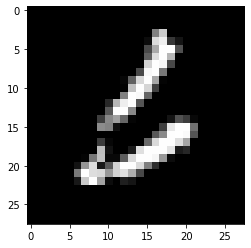

9692


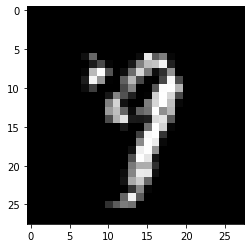

9729


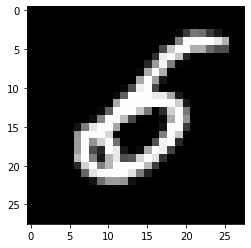

9770


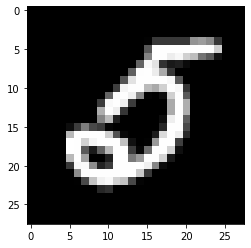

9792


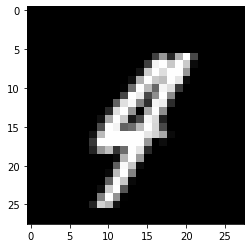

9922


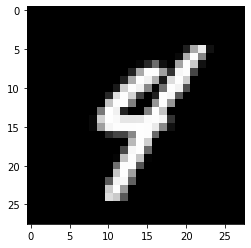

IndexError: index 10000 is out of bounds for axis 0 with size 10000

In [73]:
for index in range(1,10001):
    if Y_test[index] != Y_pred_CNNlast[index]:
        print(index)
        plt.imshow(X_test[index] * 255, cmap = 'gray')
        plt.show()